In [2]:
import pandas as pd
import numpy as np
import math
import sklearn as sk
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

df=pd.read_excel('D:/ONLINE CLASSES (ENGINEERING)/SEM 5/PROJECTS/19CSE305 MACHINE LEARNING/lab4/lab4-dataset.xlsx')
df1=pd.read_excel('D:/ONLINE CLASSES (ENGINEERING)/SEM 5/PROJECTS/19CSE305 MACHINE LEARNING/lab4/numeric_data_updated.xlsx')

A1. For the data table provided below, calculate the entropy associated with each attribute / feature 
at the root node. Using this information, identify the first feature that you’d select for constructing 
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [3]:
def ent_calc(d):

    class_count = df['buys_computer'].value_counts()
    e = 0
    ttl_samples = len(d)
    for count in class_count:
        probability = count / ttl_samples
        e -= probability * np.log2(probability)
    return e


def root_ent_calc(d, feat):
    root_ent_calc = ent_calc(d)
    feature_entropies = {}
    for f in feat:
        uniq_vals = d[f].unique()
        feat_e = 0
        for value in uniq_vals:
            subset = d[d[f] == value]
            feat_e += (len(subset) / len(d)) * ent_calc(subset)  #ent for each val
            
        feature_entropies[f] = feat_e
    return root_ent_calc, feature_entropies

feat = ['age', 'income', 'student','credit_rating','buys_computer']

root_ent, feature_entropies = root_ent_calc(df, feat)

print(f"Root Entropy is: {root_ent}")
for feature, entropy in feature_entropies.items():
    print(f"Entropy for the {feature} column: {entropy}")

Root Entropy is: 0.9402859586706311
Entropy for the age column: -1.9573507003861947
Entropy for the income column: -2.016244389439763
Entropy for the student column: -0.11942808265873811
Entropy for the credit_rating column: -0.14917542605278997
Entropy for the buys_computer column: -0.24228483044427152


A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.
A3. Visualize the constructed tree with plot_tree() command.

In [4]:
clf=tree.DecisionTreeClassifier()
# cant pass categorical data to sklearn..
#print(c1_stud)
X = df.drop('buys_computer',axis=1)

Y = df['buys_computer']
encode = pd.get_dummies(X,columns=['age', 'income', 'student', 'credit_rating'])

X_train,X_test,Y_train,Y_test = train_test_split(encode,Y,test_size=0.2)


clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print(accuracy)

0.3333333333333333


A3.Visualize the constructed tree with plot_tree() command. Following code snippet for help.

[Text(0.4444444444444444, 0.875, 'x[7] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'x[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[8] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.375, 'x[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

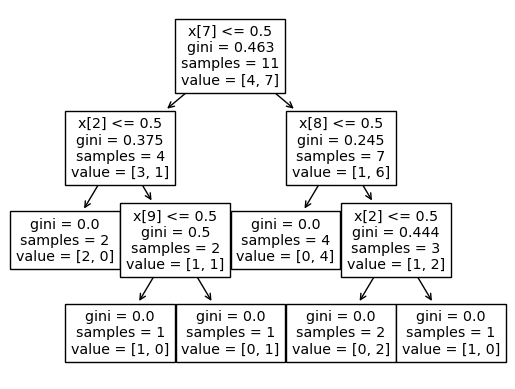

In [5]:
tree.plot_tree(clf)

A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code 
for help

Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


[Text(0.4, 0.8333333333333334, 'x[768] <= 1.938\ngini = 0.329\nsamples = 901\nvalue = [121, 726, 54]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 121\nvalue = [121, 0, 0]'),
 Text(0.6, 0.5, 'x[768] <= 4.938\ngini = 0.129\nsamples = 780\nvalue = [0, 726, 54]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 726\nvalue = [0, 726, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 54\nvalue = [0, 0, 54]')]

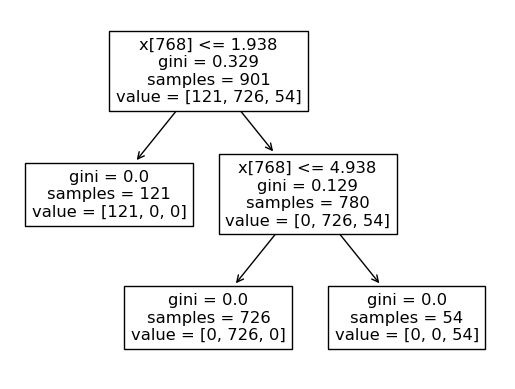

In [6]:
X=df1.drop(columns='class_encoded')
Y=df1['class_encoded']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
acc1=clf.score(X_train,Y_train)
print("Training Set Accuracy:", acc1)
acc2 = clf.score(X_test,Y_test)
print("Test Set Accuracy:", acc2)
tree.plot_tree(clf)

A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the 
accuracies. Visualize the tree constructed with max_depth constraint

[Text(0.4, 0.8333333333333334, 'x[768] <= 1.938\ngini = 0.329\nsamples = 901\nvalue = [121, 726, 54]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 121\nvalue = [121, 0, 0]'),
 Text(0.6, 0.5, 'x[768] <= 4.938\ngini = 0.129\nsamples = 780\nvalue = [0, 726, 54]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 726\nvalue = [0, 726, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 54\nvalue = [0, 0, 54]')]

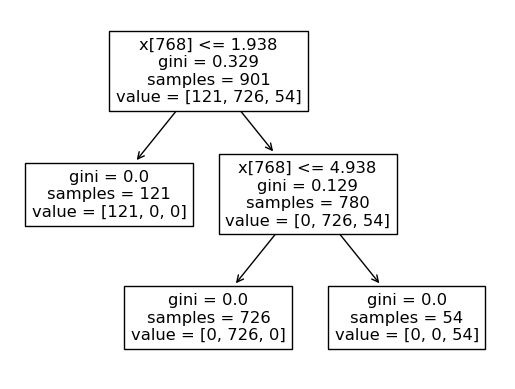

In [9]:
tree.plot_tree(clf, max_depth=5)